<a href="https://colab.research.google.com/github/ankitaattavar/Linear-Regression/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [16]:

from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/car_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


TASKS, PART 1


In [34]:
#load dataset
from sklearn.model_selection import train_test_split
x=df[["Mileage"]]
y=df[["Price"]]
y.head(2)

,Price
0,17314.103129
1,17542.036083


In [35]:
# split the training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [36]:
#reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [37]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
#Predicting the test set results
y_pred=lr.predict(x_test)
print(y_pred)

[[21241.69057107]
 [20956.50268516]
 [23413.47917503]
 [21397.10488688]
 [20588.98533004]
 [20426.07066004]
 [21142.09284455]
 [20520.26115447]
 [20832.83405451]
 [21008.48188393]
 [21192.6766286 ]
 [21519.20367595]
 [20827.07796874]
 [21370.06872644]
 [19249.2127602 ]
 [21454.66574458]
 [23635.87339799]
 [18845.76347573]
 [21037.78559331]
 [22903.80394406]
 [19746.67811226]
 [21759.73829043]
 [21632.05784242]
 [19758.36471064]
 [22271.68107034]
 [23798.78806799]
 [24666.38717779]
 [21159.70995555]
 [24296.60227373]
 [22406.51301885]
 [24521.78732615]
 [24072.98706288]
 [20259.66745322]
 [20470.02622411]
 [20228.27062174]
 [21355.24244491]
 [20613.92836838]
 [20184.14063083]
 [22962.7602165 ]
 [18549.5866988 ]
 [24166.65427679]
 [23269.57703077]
 [20972.54995458]
 [21011.62156708]
 [23174.86325581]
 [20193.38525344]
 [21646.36084343]
 [21435.65321886]
 [24039.84596299]
 [21647.40740448]
 [21571.35730157]
 [20418.04702533]
 [21328.20628447]
 [21240.64401002]
 [23399.69945455]
 [21207.67

In [39]:
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
# Linear regression equation is:
# y_pred= 24978- 0.17*x1_test

coffecient [[-0.17442684]]
Intercept [24978.08794361]


In [42]:
y_test

array([[11391.21371752],
       [35895.49940993],
       [22358.87767812],
       [13436.00014944],
       [35338.65368956],
       [12209.55962296],
       [22113.62802409],
       [19423.16502154],
       [19344.16553736],
       [12099.01457785],
       [18042.22107437],
       [29908.18098139],
       [23077.56591027],
       [28328.26653766],
       [12553.07142792],
       [16456.9746439 ],
       [15553.20871441],
       [27666.23107819],
       [26653.23939042],
       [25452.47385458],
       [ 9220.82967689],
       [17553.75368398],
       [ 9654.06014156],
       [15457.17059153],
       [22004.93043754],
       [17141.94115819],
       [20021.19520553],
       [12464.07346131],
       [29246.23733506],
       [40335.73731363],
       [48365.98089653],
       [14397.92808459],
       [33248.34252428],
       [13699.03578028],
       [13600.0341846 ],
       [20627.66168908],
       [21525.33900835],
       [28040.12852916],
       [19682.03501065],
       [11080.51637791],


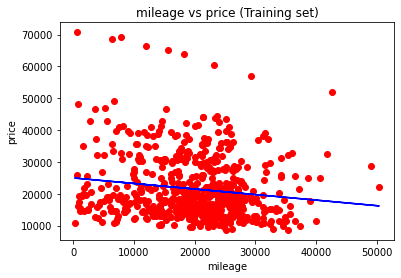

In [43]:
#2.Chart the original data and the equation on the chart.
#Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('mileage vs price (Training set)')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

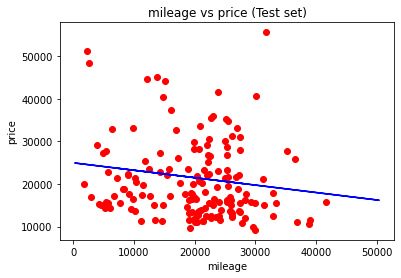

In [44]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('mileage vs price (Test set)')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

In [45]:
#Find the equation's  R2  score 
r_sq= lr.score(x_test,y_test)
print(r_sq)

0.0131586235130281


Tasks, Part 2

In [47]:
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
x1=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y1=df[["Price"]]

In [48]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

In [49]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [50]:
#.Find the linear regression equation for this data.
print("coffecient",lr1.coef_)
print("Intercept",lr1.intercept_)


coffecient [[-1.69485024e-01  4.37737213e+03 -1.51955639e+03 -1.76066431e+03
   6.55746251e+03 -1.61852765e+03  3.11678680e+03]]
Intercept [6520.70083436]


In [51]:
#Predicting the test set results
y1_pred=lr1.predict(x1_test)
print(y1_pred)

[[12423.96235034]
 [24419.94831884]
 [23690.52756691]
 [11663.23967045]
 [32916.55888883]
 [14241.04515607]
 [24700.9109194 ]
 [25310.68264298]
 [21182.99663595]
 [14726.30274514]
 [23303.12752807]
 [18187.38605702]
 [25608.8068003 ]
 [19661.00400954]
 [19654.99220787]
 [18498.49067781]
 [13838.57995424]
 [18068.62547327]
 [17719.60739062]
 [35165.79464312]
 [19147.29636635]
 [18794.91998489]
 [11305.01068145]
 [19835.05760897]
 [25393.95412146]
 [31006.94667922]
 [26222.55486404]
 [21511.36167639]
 [22960.49066138]
 [34682.59283953]
 [35119.4100782 ]
 [17784.6380391 ]
 [22559.25787912]
 [20841.21789126]
 [10932.06233796]
 [24959.34672322]
 [27304.49706737]
 [24885.11374742]
 [27683.98143488]
 [ 8896.39665268]
 [24433.11400615]
 [19888.16827346]
 [22078.53233717]
 [34721.17076525]
 [25229.15534148]
 [10493.62351941]
 [11905.43376983]
 [18258.15836989]
 [23995.23700952]
 [22886.22553464]
 [18997.84027616]
 [20790.71135409]
 [23597.5231365 ]
 [18980.40794932]
 [26945.88069022]
 [14463.98

In [54]:
y1_test

,Price
182,11391.213718
137,35895.499410
20,22358.877678
285,13436.000149
107,35338.653690
...,...
707,28678.075251
579,15756.146130
594,12832.462388
322,15084.815404


In [56]:
#Find the equation's  R2  score 
r_sq1= lr1.score(x1_test,y1_test)
print(r_sq1)

0.4112065772089749


In [57]:
## 3. Find the combination of the factors that is the best predictor for price.

df.corr()
#According to correlation values, we found that Cylinder,Litre and Cruise have good correaltion with Price

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


TASK, HARD MODE:
Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [59]:
print(df.Make.value_counts())
#print(df.Model.value_counts())
#print(df.Type.value_counts())

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64


In [60]:
print(df.Model.value_counts())

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64


In [61]:
print(df.Type.value_counts())

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer 
le=LabelEncoder()

In [64]:
df['Model']=le.fit_transform(df["Model"])
print(df['Model'])


0      10
1      10
2      10
3      10
4      10
       ..
799    21
800    21
801    21
802    21
803    21
Name: Model, Length: 804, dtype: int64


In [65]:
print(df.Model.value_counts())

24    60
5     60
9     60
20    50
12    50
2     40
30    30
6     30
25    30
22    30
19    30
18    30
3     30
14    30
23    20
13    20
1     20
4     20
15    20
17    20
26    20
29    10
10    10
16    10
11    10
31    10
28    10
27    10
8     10
7     10
21    10
0      4
Name: Model, dtype: int64


In [66]:
df['Make']=le.fit_transform(df["Make"])
print(df.Make.value_counts())

2    320
3    150
4    114
0     80
1     80
5     60
Name: Make, dtype: int64


In [67]:
lb=LabelBinarizer()
df['Type']=lb.fit_transform(df["Type"])
print(df.Type.value_counts())

0    754
1     50
Name: Type, dtype: int64


In [71]:
temp=df[['Type', 'Model', 'Make','Price']]
temp.corr()

,Type,Model,Make,Price
Type,1.000000,-0.149113,0.117119,0.508018
Model,-0.149113,1.000000,-0.295619,-0.026599
Make,0.117119,-0.295619,1.000000,-0.131644
Price,0.508018,-0.026599,-0.131644,1.000000


In [70]:
df.corr()

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,-0.131644,-0.026599,0.508018,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,0.028632,-0.026810,0.027436,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Make,-0.131644,0.028632,1.000000,-0.295619,0.117119,-0.474727,-0.421690,-0.142858,-0.124232,-0.124200,-0.065295
Model,-0.026599,-0.026810,-0.295619,1.000000,-0.149113,0.359248,0.347102,-0.027162,-0.088165,0.022747,-0.082459
Type,0.508018,0.027436,0.117119,-0.149113,1.000000,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285
Cylinder,0.569086,-0.029461,-0.474727,0.359248,0.061533,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,-0.421690,0.347102,0.065886,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,-0.142858,-0.027162,-0.462921,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,-0.124232,-0.088165,0.147689,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.124200,0.022747,-0.043637,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444


In [72]:
## 2. Find the combination of the factors that is the best predictor for price.

corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Cylinder    0.569086
Liter       0.558146
Type        0.508018
Cruise      0.430851
Name: Price, dtype: float64
